In [42]:
import os
import django
from django.db import connection
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'activity_viewer.settings')
django.setup()

In [43]:
from dashboard.models import Log, Item

In [44]:
files_downloaded = Log.objects.values_list('s3_key').filter(http_status=200)

In [45]:
df = pd.DataFrame(files_downloaded, columns=['key'])

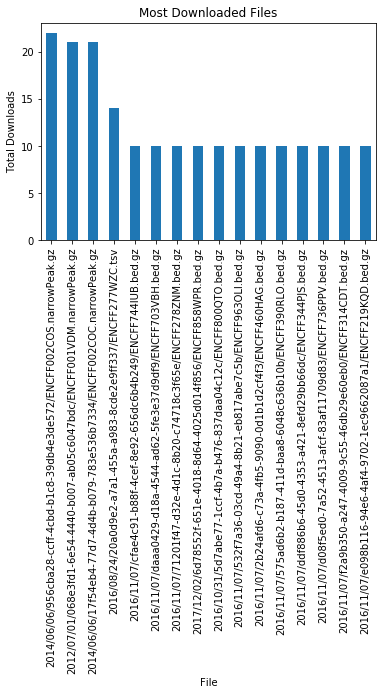

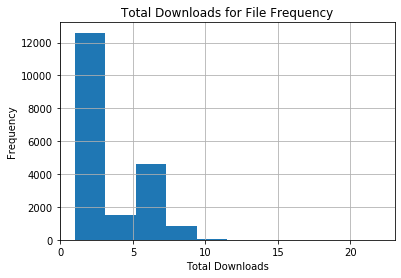

In [46]:
counts = df.groupby(by='key').size().sort_values(ascending=False)
axes = counts.head(16).plot(kind='bar')
axes.set(xlabel='File', ylabel='Total Downloads', title='Most Downloaded Files')
plt.show()

axes = counts.hist()
axes.set(xlabel='Total Downloads', ylabel='Frequency', title='Total Downloads for File Frequency')
plt.show()

In [47]:
print(f'Mean Downloads: {counts.mean():.1f}, Standard Deviation: {counts.std():.1f}')

Mean Downloads: 3.1, Standard Deviation: 2.4


In [50]:
unique_files_downloaded = df.drop_duplicates().size
available_files = Item.objects.count()
print(f'Files Downloaded: {unique_files_downloaded}, Files Available {available_files}, Percent Accessed: {(unique_files_downloaded / available_files):.0%}')

Files Downloaded: 19615, Files Available 442465, Percent Accessed: 4%


In [ ]:
print(connection.queries)